<a href="https://colab.research.google.com/github/SHAHAB-UDDIN54/Artificial-intelligence-Ai-projects/blob/main/Day_5_class_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load dataset
df = pd.read_csv("/content/house price.csv")
df.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_removed,price
0,4,1.6,2196,9032,2.0,0,4,4,1028,1168,2020,0,82966
1,5,2.5,3806,1001,2.5,0,0,2,2718,1088,1962,0,470993
2,3,2.4,2020,7368,2.0,0,3,3,750,1270,2005,0,1354309
3,5,3.2,3022,12040,1.5,0,0,3,2288,734,1953,0,213639
4,5,3.2,4948,13236,1.0,1,1,5,3958,990,1941,0,296331


In [3]:
# Convert price into discrete class
median_price = df['price'].median()
df['price_class'] = (df['price'] >= median_price).astype(int)

In [4]:
# Features and target
X = df.drop(['price', 'price_class'], axis=1)
y = df['price_class']

In [5]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [10]:
# Store results
results = {}

# Train and Evaluate
for name, model in models.items():
    print("\n==============================")
    print("Model:", name)

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print("Accuracy:", acc)


Model: Logistic Regression
Accuracy: 0.49

Model: Decision Tree
Accuracy: 0.46

Model: KNN
Accuracy: 0.56


In [9]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(name, "Accuracy:", acc)

Logistic Regression Accuracy: 0.49
Decision Tree Accuracy: 0.44
KNN Accuracy: 0.56


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Confusion Matrix:
[[31 17]
 [27 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.65      0.58        48
           1       0.60      0.48      0.53        52

    accuracy                           0.56       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.57      0.56      0.56       100



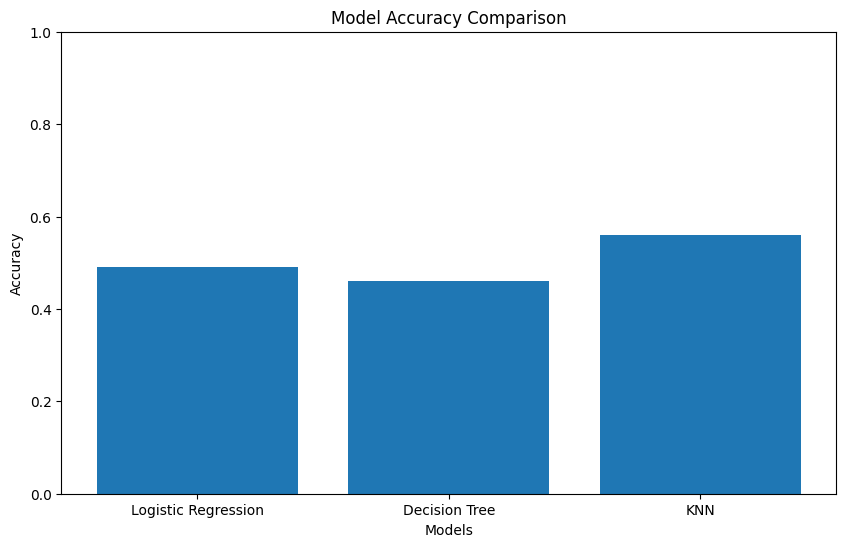

In [14]:
import matplotlib.pyplot as plt

# Confusion Matrix for the last trained model (KNN)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1 Score for the last trained model (KNN)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Model Comparison Graph
models_list = list(results.keys())
accuracy_list = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(models_list, accuracy_list)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.show()